In [78]:


import pandas as pd
import numpy as np

#for graphviz install python-graphviz:
#conda install python-graphviz


In [79]:
input_file = "data/restaurant.csv"
# input_file = "data/restaurant100v3.csv"

# comma delimited is the default
data = pd.read_csv(input_file, header = 0)

In [80]:
data

Alt  Bar  Fri  Hyn   Pat Price Rain  Res     Type    Est WillWait
0   Yes   No   No  Yes  Some   $$$   No  Yes   French   0–10      Yes
1   Yes   No   No  Yes  Full     $   No   No     Thai  30–60       No
2    No  Yes   No   No  Some     $   No   No   Burger   0–10      Yes
3   Yes   No  Yes  Yes  Full     $  Yes   No     Thai  10–30      Yes
4   Yes   No  Yes   No  Full   $$$   No  Yes   French    >60       No
..  ...  ...  ...  ...   ...   ...  ...  ...      ...    ...      ...
95   No  Yes  Yes  Yes  Full     $  Yes   No   Burger  30–60      Yes
96  Yes  Yes  Yes   No  Full    $$   No   No   Burger    >60       No
97   No  Yes  Yes  Yes  Full     $  Yes  Yes  Italian  10–30       No
98  Yes   No   No   No   NaN    $$  Yes   No     Thai   0–10       No
99   No  Yes  Yes  Yes  Full    $$  Yes   No   Burger  30–60      Yes

[100 rows x 11 columns]

In [81]:
data.shape

(100, 11)

In [82]:
data.columns

Index(['Alt', 'Bar', 'Fri', 'Hyn', 'Pat', 'Price', 'Rain', 'Res', 'Type',
       'Est', 'WillWait'],
      dtype='object')

In [83]:
data.head()

Alt  Bar  Fri  Hyn   Pat Price Rain  Res    Type    Est WillWait
0  Yes   No   No  Yes  Some   $$$   No  Yes  French   0–10      Yes
1  Yes   No   No  Yes  Full     $   No   No    Thai  30–60       No
2   No  Yes   No   No  Some     $   No   No  Burger   0–10      Yes
3  Yes   No  Yes  Yes  Full     $  Yes   No    Thai  10–30      Yes
4  Yes   No  Yes   No  Full   $$$   No  Yes  French    >60       No

In [84]:
data.dtypes

Alt         object
Bar         object
Fri         object
Hyn         object
Pat         object
Price       object
Rain        object
Res         object
Type        object
Est         object
WillWait    object
dtype: object

In [85]:
data.columns.values

array(['Alt', 'Bar', 'Fri', 'Hyn', 'Pat', 'Price', 'Rain', 'Res', 'Type',
       'Est', 'WillWait'], dtype=object)

In [86]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data['Type']) # only for one attribute
data_encoded = le.transform(data['Type'])
data_encoded

array([1, 3, 0, 3, 1, 2, 0, 3, 0, 2, 3, 0, 1, 3, 0, 3, 1, 2, 0, 3, 0, 2,
       3, 0, 1, 3, 0, 3, 1, 2, 0, 3, 0, 2, 3, 0, 1, 3, 0, 3, 1, 2, 0, 3,
       0, 2, 3, 0, 1, 3, 0, 3, 1, 2, 0, 3, 0, 2, 3, 0, 1, 3, 0, 3, 1, 2,
       0, 3, 0, 2, 3, 0, 1, 3, 0, 3, 1, 2, 0, 3, 0, 2, 3, 0, 1, 3, 0, 3,
       1, 2, 0, 3, 0, 2, 3, 0, 0, 2, 3, 0])

In [87]:
le.classes_

array(['Burger', 'French', 'Italian', 'Thai'], dtype=object)

In [88]:
data_encoded = data.apply(le.fit_transform) # for all the attributes
data_encoded

Alt  Bar  Fri  Hyn  Pat  Price  Rain  Res  Type  Est  WillWait
0     1    0    0    1    1      2     0    1     1    0         1
1     1    0    0    1    0      0     0    0     3    2         0
2     0    1    0    0    1      0     0    0     0    0         1
3     1    0    1    1    0      0     1    0     3    1         1
4     1    0    1    0    0      2     0    1     1    3         0
..  ...  ...  ...  ...  ...    ...   ...  ...   ...  ...       ...
95    0    1    1    1    0      0     1    0     0    2         1
96    1    1    1    0    0      1     0    0     0    3         0
97    0    1    1    1    0      0     1    1     2    1         0
98    1    0    0    0    2      1     1    0     3    0         0
99    0    1    1    1    0      1     1    0     0    2         1

[100 rows x 11 columns]

In [89]:
from sklearn import tree
clf1 = tree.DecisionTreeClassifier(criterion="entropy")
x = data_encoded[data.columns.drop('WillWait')]
y = data_encoded['WillWait']

In [90]:
x

Alt  Bar  Fri  Hyn  Pat  Price  Rain  Res  Type  Est
0     1    0    0    1    1      2     0    1     1    0
1     1    0    0    1    0      0     0    0     3    2
2     0    1    0    0    1      0     0    0     0    0
3     1    0    1    1    0      0     1    0     3    1
4     1    0    1    0    0      2     0    1     1    3
..  ...  ...  ...  ...  ...    ...   ...  ...   ...  ...
95    0    1    1    1    0      0     1    0     0    2
96    1    1    1    0    0      1     0    0     0    3
97    0    1    1    1    0      0     1    1     2    1
98    1    0    0    0    2      1     1    0     3    0
99    0    1    1    1    0      1     1    0     0    2

[100 rows x 10 columns]

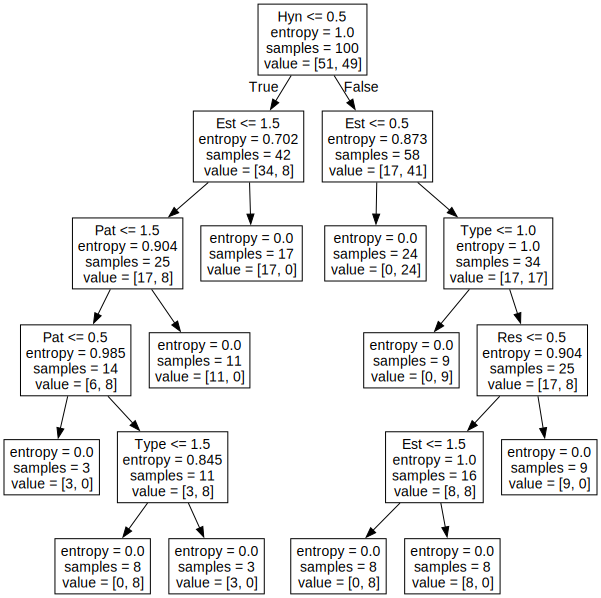

In [91]:
clf1.fit(x,y)
import graphviz
dot_data = tree.export_graphviz(clf1, out_file = None, feature_names= x.columns)
graph1 = graphviz.Source(dot_data)
graph1
#graph.render("restaurant") # save it to pdf

In [92]:
data_2 = pd.get_dummies(data, columns=data.columns) #one hot encoding
data_2

Alt_No  Alt_Yes  Bar_No  Bar_Yes  Fri_No  Fri_Yes  Hyn_No  Hyn_Yes  \
0    False     True    True    False    True    False   False     True   
1    False     True    True    False    True    False   False     True   
2     True    False   False     True    True    False    True    False   
3    False     True    True    False   False     True   False     True   
4    False     True    True    False   False     True    True    False   
..     ...      ...     ...      ...     ...      ...     ...      ...   
95    True    False   False     True   False     True   False     True   
96   False     True   False     True   False     True    True    False   
97    True    False   False     True   False     True   False     True   
98   False     True    True    False    True    False    True    False   
99    True    False   False     True   False     True   False     True   

    Pat_Full  Pat_Some  ...  Type_Burger  Type_French  Type_Italian  \
0      False      True  ...        False         True         False   
1       True     False  ...        False        False         False   
2      False      True  ...         True        False         False   
3       True     False  ...        False        False         False   
4       True     False  ...        False         True         False   
..       ...       ...  ...          ...          ...           ...   
95      True     False  ...         True        False         False   
96      True     False  ...         True        False         False   
97      True     False  ...        False        False          True   
98     False     False  ...        False        False         False   
99      True     False  ...         True        False         False   

    Type_Thai  Est_0–10  Est_10–30  Est_30–60  Est_>60  WillWait_No  \
0       False      True      False      False    False        False   
1        True     False      False       True    False         True   
2       False      True      False      False    False        False   
3        True     False       True      False    False        False   
4       False     False      False      False     True         True   
..        ...       ...        ...        ...      ...          ...   
95      False     False      False       True    False        False   
96      False     False      False      False     True         True   
97      False     False       True      False    False         True   
98       True      True      False      False    False         True   
99      False     False      False       True    False        False   

    WillWait_Yes  
0           True  
1          False  
2           True  
3           True  
4          False  
..           ...  
95          True  
96         False  
97         False  
98         False  
99          True  

[100 rows x 27 columns]

In [93]:
clf2 = tree.DecisionTreeClassifier(criterion="entropy")
x2 = data_2[data_2.columns.drop(['WillWait_No', 'WillWait_Yes'])]
y2 = data_2['WillWait_Yes']

In [94]:
x2.head()

Alt_No  Alt_Yes  Bar_No  Bar_Yes  Fri_No  Fri_Yes  Hyn_No  Hyn_Yes  \
0   False     True    True    False    True    False   False     True   
1   False     True    True    False    True    False   False     True   
2    True    False   False     True    True    False    True    False   
3   False     True    True    False   False     True   False     True   
4   False     True    True    False   False     True    True    False   

   Pat_Full  Pat_Some  ...  Res_No  Res_Yes  Type_Burger  Type_French  \
0     False      True  ...   False     True        False         True   
1      True     False  ...    True    False        False        False   
2     False      True  ...    True    False         True        False   
3      True     False  ...    True    False        False        False   
4      True     False  ...   False     True        False         True   

   Type_Italian  Type_Thai  Est_0–10  Est_10–30  Est_30–60  Est_>60  
0         False      False      True      False      False    False  
1         False       True     False      False       True    False  
2         False      False      True      False      False    False  
3         False       True     False       True      False    False  
4         False      False     False      False      False     True  

[5 rows x 25 columns]

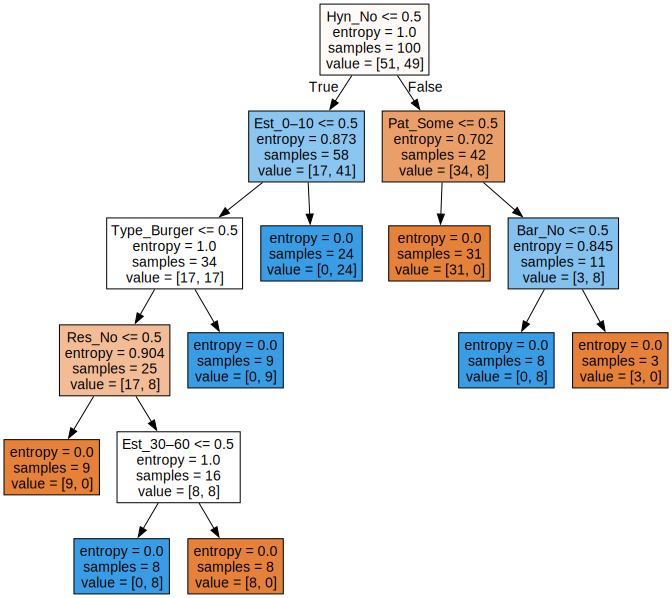

In [95]:
clf2.fit(x2,y2)
import graphviz
dot_data = tree.export_graphviz(clf2, out_file = None, feature_names=x2.columns,  
                         filled=True)
graph2 = graphviz.Source(dot_data)
graph2
#graph.render("restaurant2")

In [96]:
#predict 
my_test=[1,0,0,1,0,2,0,1,1,0]
clf1.predict([my_test])


C:\Users\gogac\anaconda3\envs\lab04\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [97]:
clf1.predict_proba([my_test]) #change the example and see the prediction

C:\Users\gogac\anaconda3\envs\lab04\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0., 1.]])

In [98]:
clf1.score(x,y)

1.0

In [99]:
#or use cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(clf1, x,y,cv=2)

array([1.  , 0.94])

Play with pandas frame in order to compute InfoGain



In [100]:
data['Pat']

0     Some
1     Full
2     Some
3     Full
4     Full
      ... 
95    Full
96    Full
97    Full
98     NaN
99    Full
Name: Pat, Length: 100, dtype: object

In [101]:
no, yes = data['WillWait'].value_counts() #how many examples have WillWait='No', respectively Yes
print(data.groupby('Pat').count())
res = data['WillWait'][data['Pat']=='Full'].value_counts()
res

      Alt  Bar  Fri  Hyn  Price  Rain  Res  Type  Est  WillWait
Pat                                                            
Full   43   43   43   43     43    43   43    43   43        43
Some   25   25   25   25     25    25   25    25   25        25


WillWait
No     30
Yes    13
Name: count, dtype: int64

In [102]:
from math import log
def B(probs):
    return sum([-p*log(p,2) for p in probs if p>0])
B([1, 0])

0.0

In [103]:
B([no/(no+yes), yes/(no+yes)]) #entropy for WillWait

0.9997114417528099

In [104]:
#def remainder(attrib):
data['Pat'].value_counts()

Pat
Full    43
Some    25
Name: count, dtype: int64

In [111]:
remainder=0
attrib='Pat'
p=data['WillWait'].value_counts()['Yes']
n=data['WillWait'].value_counts()['No']
print(p,n)
values = np.delete(data[attrib].unique(), 2, 0)
for v in values:
    print("Value of the attribute: ", v)
    no_examples = data['WillWait'][data[attrib]==v].value_counts()
    print(no_examples)
    nk=0
    pk=0
    if 'No' in no_examples.keys().tolist():
        nk=no_examples['No']
    if 'Yes' in no_examples.keys().tolist():
        pk=no_examples['Yes']
    print("pozitive and negative number of examples:", pk,nk)
    remainder+=(pk+nk)/(p+n) * B([pk/(pk+nk), nk/(pk+nk)])
infoGain = B([n/(n+p), p/(n+p)])-remainder

infoGain

49 51
Value of the attribute:  Some
WillWait
Yes    22
No      3
Name: count, dtype: int64
pozitive and negative number of examples: 22 3
Value of the attribute:  Full
WillWait
No     30
Yes    13
Name: count, dtype: int64
pozitive and negative number of examples: 13 30


np.float64(0.4872017229499642)

# Your turn: Apply DecisionTree on the iris dataset.
1. Load iris dataset
2. see the content of the loaded data
3. Identify the classes (target names) & feature names
4. View the first 5 examples
5. Apply decision tree on the entire dataset
6. View the resulting tree
7. Predict the result for the flowers with the following characteristics: 4.7 3.3  1.3  0.2 and 5 1.2  3.3  2.2
8. Measure accuracy over the entire dataset (use "accuracy_score"from sklearn.metrics)

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris
from sklearn.datasets import load_iris
data=load_iris()
data #2

In [ ]:
#3

In [ ]:
#4

In [ ]:
#4

In [ ]:
from sklearn import tree #5
clf_your = "todo"

In [ ]:
import graphviz  #6
dot_data = tree.export_graphviz(clf_your, out_file = None, feature_names=data.feature_names,  
                         filled=True)
graph2 = graphviz.Source(dot_data)
graph2

In [ ]:
my_test=[] #7


In [ ]:
from sklearn.metrics import accuracy_score #8


# 5.3 XOR Decision Tree

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
# Create the XOR truth table
data = {
    'X1': [0, 0, 0, 0, 1, 1, 1, 1],
    'X2': [0, 0, 1, 1, 0, 0, 1, 1],
    'X3': [0, 1, 0, 1, 0, 1, 0, 1],
    'Y':  [0, 1, 1, 0, 1, 0, 0, 1]
}



# 5.4 Learning curve

In [ ]:
from sklearn.model_selection import train_test_split
import random
# Generate a dataset of 100 random examples
random.seed(42)  # for reproducibility
num_examples = 100
# Define possible values for each column
attributes = {
    'Alt': ['Yes', 'No'],
    'Bar': ['Yes', 'No'],
    'Fri': ['Yes', 'No'],
    'Hyn': ['Yes', 'No'],
    'Pat': ['Some', 'Full', 'None'],
    'Price': ['$', '$$', '$$$'],
    'Rain': ['Yes', 'No'],
    'Res': ['Yes', 'No'],
    'Type': ['French', 'Thai', 'Burger', 'Italian'],
    'Est': ['0–10', '10–30', '30–60', '>60']
}

# Generate unique rows
rows = []
cnt = 0
while cnt < num_examples:
    row = {col: random.choice(attributes[col]) for col in attributes}
    if row not in rows:  # Ensure uniqueness
        rows.append(row)
        cnt += 1

for row in rows:
    row['WillWait'] = random.choice(['Yes', 'No'])
    
    

# 5.5 Overfitting

In [ ]:


attributes = {
    'Alt': ['Yes', 'No'],
    'Bar': ['Yes', 'No'],
    'Fri': ['Yes', 'No'],
    'Hyn': ['Yes', 'No'],
    'Pat': ['Some', 'Full', 'None'],
    'Price': ['$', '$$', '$$$'],
    'Rain': ['Yes', 'No'],
    'Res': ['Yes', 'No'],
    'Type': ['French', 'Thai', 'Burger', 'Italian'],
    'Est': ['0–10', '10–30', '30–60', '>60']
}
num_examples=900
# Generate unique rows
rows = []
cnt = 0
while cnt < num_examples:
    row = {col: random.choice(attributes[col]) for col in attributes}
    if row not in rows:  # Ensure uniqueness
        rows.append(row)
        cnt += 1

for row in rows:
    row['WillWait'] = random.choice(['Yes', 'No'])

tree_depths = range(1,21)

